In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-pastel")

In [34]:
df = pd.read_json('evals.json')

In [35]:
df.head()

,benchmarkId,consumers,percentileResults,producers,q1Throughput,q1_90Percentile,q1_count,q2Throughput,q2_90Percentile,q2_count,seconds
0,6445237014050734000,4,"[{'percentile': 50, 'q1Latency': 246415359, 'q...",1,128.921550,265.945087,993,128.791720,270.532607,992,7.702359
1,6228436344855340000,8,"[{'percentile': 50, 'q1Latency': 237502463, 'q...",1,134.254950,249.167871,993,134.119748,251.527167,992,7.396375
2,1619572463597370600,12,"[{'percentile': 50, 'q1Latency': 258998271, 'q...",1,122.478263,275.513343,993,122.354921,277.872639,992,8.107561
3,3341907533043770400,16,"[{'percentile': 50, 'q1Latency': 268042239, 'q...",1,118.333712,284.164095,993,118.214544,285.999103,992,8.391522
4,3592461873604799500,4,"[{'percentile': 50, 'q1Latency': 235274239, 'q...",2,135.052473,258.867199,993,134.916468,263.454719,992,7.352698


In [36]:
df = df.drop(['percentileResults'], axis=1)
df.head()

,benchmarkId,consumers,producers,q1Throughput,q1_90Percentile,q1_count,q2Throughput,q2_90Percentile,q2_count,seconds
0,6445237014050734000,4,1,128.921550,265.945087,993,128.791720,270.532607,992,7.702359
1,6228436344855340000,8,1,134.254950,249.167871,993,134.119748,251.527167,992,7.396375
2,1619572463597370600,12,1,122.478263,275.513343,993,122.354921,277.872639,992,8.107561
3,3341907533043770400,16,1,118.333712,284.164095,993,118.214544,285.999103,992,8.391522
4,3592461873604799500,4,2,135.052473,258.867199,993,134.916468,263.454719,992,7.352698


In [37]:
def plot_column(df, col, labels):
    plt.figure(figsize = (10,8))
    col_df = df[['consumers', 'producers', col]]
    pivoted = col_df.pivot(index='consumers', columns='producers', values=col)
    p = sns.lineplot(data=pivoted)
    p.set_xlabel(labels['x'])
    p.set_ylabel(labels['y'])
    p.set_title(labels['title'])
    plt.show()

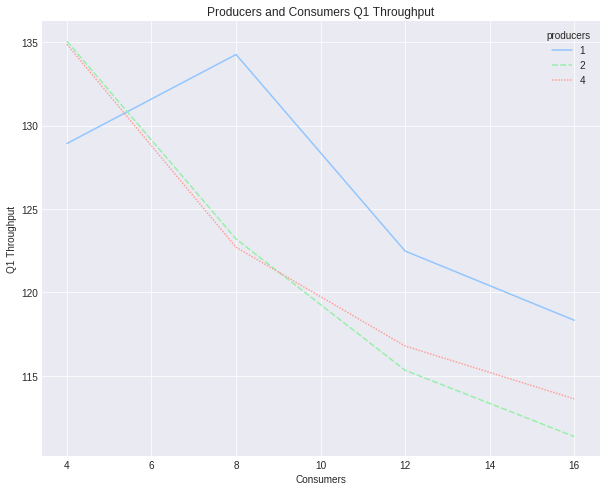

In [38]:
plot_column(df, 'q1Throughput', {'x': 'Consumers', 'y': 'Q1 Throughput', 'title': 'Producers and Consumers Q1 Throughput'})

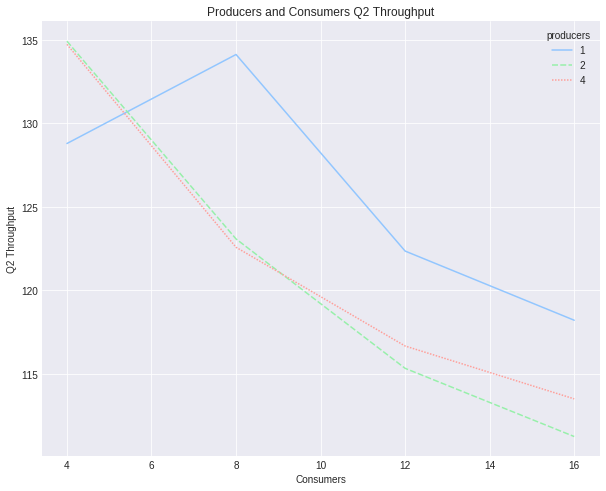

In [39]:
plot_column(df, 'q2Throughput', {'x': 'Consumers', 'y': 'Q2 Throughput', 'title': 'Producers and Consumers Q2 Throughput'})

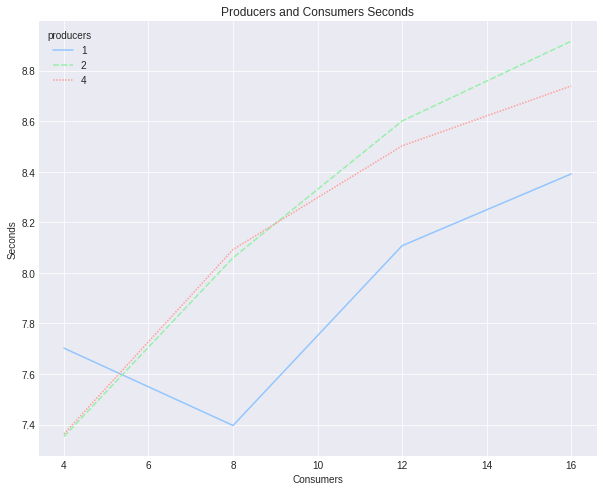

In [40]:
plot_column(df, 'seconds', {'x': 'Consumers', 'y': 'Seconds', 'title': 'Producers and Consumers Seconds'})